In [1]:
from unet import Unet
from n2v import N2VConfig, N2VDataGenerator
from os.path import join

dataset_dir = 'D:\Project\FYP\dataset'
noisy_inputs = ["mito-60x-noise1-lowsnr.tif",
            "actin-confocal-lowsnr.tif",
            "actin-60x-noise1-lowsnr.tif"]
ground_truth = ["mito-60x-noise1-highsnr.tif",
                "actin-confocal-highsnr.tif",
                "actin-60x-noise1-highsnr.tif"]
file_paths = [join(dataset_dir, dataset) for dataset in noisy_inputs]
ground_truth_paths = [join(dataset_dir, dataset) for dataset in ground_truth]
config = N2VConfig(file_paths, ground_truth_paths,
                   patch_shape=(128, 128),
                   validation_split=0.05,
                   patches_per_batch=32,
                   data_augmentation=3,
                   epochs=20)

n2v_data_generator = N2VDataGenerator(config)
unet = Unet(config,model_summary=False)

In [2]:
history = unet.train(n2v_data_generator)
# 可以在Tensorboard查看训练损失和验证损失的变化情况
# cmd: tensorboard --logdir tensorboard 

steps_per_epoch: 6688
Epoch 1/4
10/10 [==============================] - 20s 1s/step - loss: 0.0287 - val_loss: 0.0225 - lr: 0.0010
Epoch 2/4
10/10 [==============================] - 14s 1s/step - loss: 0.0131 - val_loss: 0.0131 - lr: 0.0010
Epoch 3/4
10/10 [==============================] - 14s 1s/step - loss: 0.0080 - val_loss: 0.0116 - lr: 0.0010
Epoch 4/4
10/10 [==============================] - 14s 1s/step - loss: 0.0054 - val_loss: 0.0356 - lr: 0.0010


In [2]:
# 用小数据集做实验
file_paths = ["D:\Project\FYP\dataset_small\\train\\actin-60x-noise1-lowsnr.tif"]
ground_truth_paths = ["D:\Project\FYP\dataset_small\ground_truth\\actin-60x-noise1-highsnr.tif"]
config = N2VConfig(file_paths, ground_truth_paths)
evaluation_generator = N2VDataGenerator(config)
# ! 请确保保存路径的文件夹存在
result=unet.evaluate(evaluation_generator, divide=2, save_path="restored_images/restored.tif")

0
1
2
3
4


In [3]:
print(result)

{'duration': 1.8, 'ssim': 0.11084597, 'psnr': 12.9254, 'old_ssim': 16.294193, 'old_psnr': 16.294193}


以下代码暂时没用

In [2]:
# import matplotlib.pyplot as plt
# a=n2v_data_generator.get_training_batch()
# inputs, targets=next(a)
# outputs=unet.model.predict(inputs)

In [20]:
# from PIL import Image
# import numpy as np
# with Image.open(join(dataset_dir, datasets[0])) as image:
#     image.seek(20)
#     inputs=np.array(image)[np.newaxis, 1024:,:1024 ,np.newaxis]
#     outputs=unet.model.predict(inputs)
    # inputs=np.array(image)[np.newaxis,...,np.newaxis]
    # outputs=unet.model.predict(inputs[:,1024:,:1024,:])

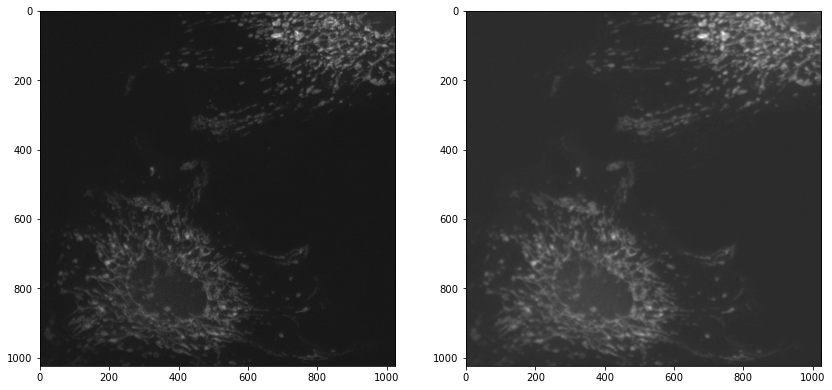

In [21]:
# plt.figure(figsize=(14,7))
# index=0
# plt.subplot(121)
# plt.imshow(inputs[index,...,0],cmap="gray")
# plt.subplot(122)
# plt.imshow(outputs[index,...,0],cmap="gray") # after denoising
# plt.subplot(143)
# plt.imshow(targets[index,...,0],cmap="gray") # before denoising
# plt.subplot(144)
# plt.imshow(targets[index,...,1],cmap="gray")